In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
sales = pd.read_csv('vgsales.csv')
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<IPython.core.display.Javascript object>


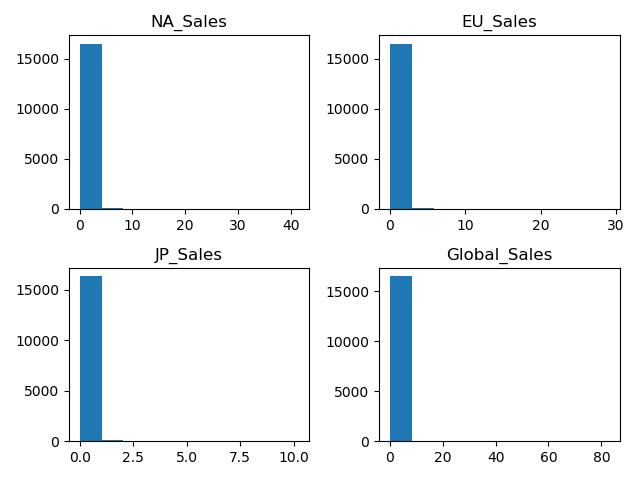

(array([1.6518e+04, 5.5000e+01, 1.5000e+01, 6.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  4.149,  8.298, 12.447, 16.596, 20.745, 24.894, 29.043,
        33.192, 37.341, 41.49 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'NA_Sales')

(array([1.6526e+04, 5.1000e+01, 1.2000e+01, 7.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  2.902,  5.804,  8.706, 11.608, 14.51 , 17.412, 20.314,
        23.216, 26.118, 29.02 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'EU_Sales')

(array([1.6364e+04, 1.5400e+02, 4.0000e+01, 2.0000e+01, 1.1000e+01,
        5.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  1.022,  2.044,  3.066,  4.088,  5.11 ,  6.132,  7.154,
         8.176,  9.198, 10.22 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'JP_Sales')

(array([1.6516e+04, 5.9000e+01, 1.3000e+01, 7.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e-02, 8.2830e+00, 1.6556e+01, 2.4829e+01, 3.3102e+01,
        4.1375e+01, 4.9648e+01, 5.7921e+01, 6.6194e+01, 7.4467e+01,
        8.2740e+01]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Global_Sales')

In [13]:
fig, ax = plt.subplots(2,2)

ax0, ax1, ax2, ax3 = ax.flat

ax0.hist(sales['NA_Sales'])
ax0.set_title('NA_Sales')

ax1.hist(sales['EU_Sales'])
ax1.set_title('EU_Sales')

ax2.hist(sales['JP_Sales'])
ax2.set_title('JP_Sales')

ax3.hist(sales['Global_Sales'])
ax3.set_title('Global_Sales')

plt.tight_layout()

plt.show()

In [18]:
genre = sales[['Genre','NA_Sales','EU_Sales','JP_Sales']].groupby(['Genre'],as_index=False).sum()
genre 

,Genre,NA_Sales,EU_Sales,JP_Sales
0,Action,877.83,525.00,159.95
1,Adventure,105.80,64.13,52.07
2,Fighting,223.59,101.32,87.35
3,Misc,410.24,215.98,107.76
4,Platform,447.05,201.63,130.77
5,Puzzle,123.78,50.78,57.31
6,Racing,359.42,238.39,56.69
7,Role-Playing,327.28,188.06,352.31
8,Shooter,582.60,313.27,38.28
9,Simulation,183.31,113.38,63.70


In [22]:
len(genre)

12

<IPython.core.display.Javascript object>


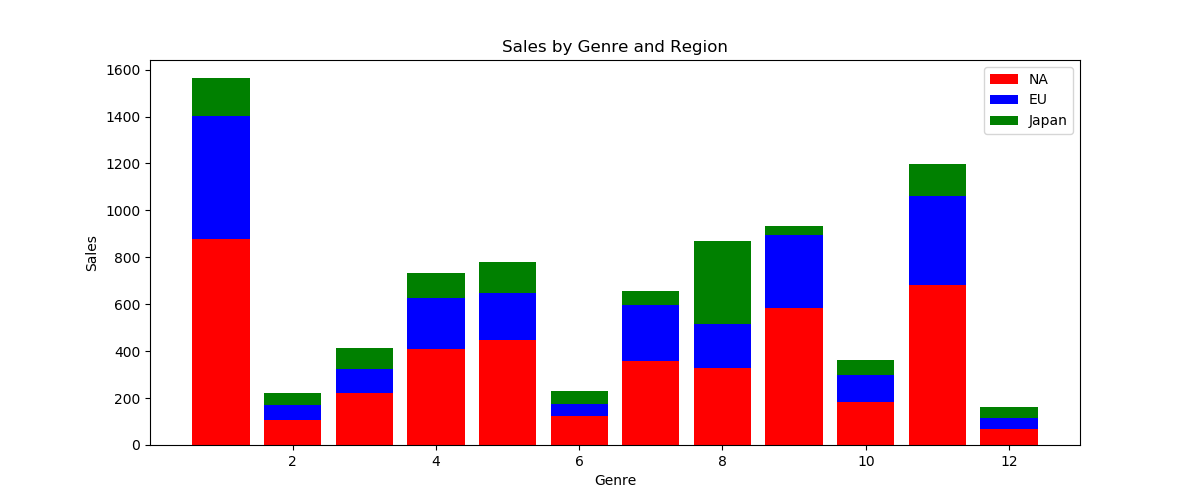

<BarContainer object of 12 artists>

<BarContainer object of 12 artists>

<BarContainer object of 12 artists>

Text(0.5, 1.0, 'Sales by Genre and Region')

Text(0.5, 0, 'Genre')

Text(0, 0.5, 'Sales')

In [23]:
fig, ax = plt.subplots(figsize=(12,5))

bar_l = [i + 1 for i in range(len(genre))]
ax.bar(bar_l, genre['NA_Sales'],label='NA',color='red')
ax.bar(bar_l,genre['EU_Sales'],bottom=genre['NA_Sales'],label='EU',color='blue')
ax.bar(bar_l,genre['JP_Sales'],bottom=[i+j for i,j in zip(genre['NA_Sales'],genre['EU_Sales'])],
      label='Japan',
       color='green'
      )

ax.set_title('Sales by Genre and Region')
ax.set_xlabel('Genre')
ax.set_ylabel('Sales')
plt.legend(loc='upper right')


In [20]:
genre.shape

(12, 4)